# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter 
from sklearn import model_selection

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
u = files.upload()

Saving stsa-test.txt to stsa-test.txt
Saving stsa-train.txt to stsa-train.txt


In [ ]:
def  text_splitter(x):
  x = x.split(" ")
  return x[0], x[1:]

In [ ]:
train = pd.DataFrame(columns= ['text', 'target'])
test = pd.DataFrame(columns= ['text', 'target'])
with open('stsa-train.txt') as f:
  for i in f.readlines():
    target, text = text_splitter(i)
    train.loc[len(train.index)] = [text, target]

with open('stsa-test.txt') as f:
  for i in f.readlines():
    target, text = text_splitter(i)
    test.loc[len(test.index)] = [text, target]

In [ ]:
stop_word = stopwords.words('english')
p = ['0','1','2','3','4','5','6','7','8','9']
def text_manipulation(texts):
  without_punt = []
  without_stop_w = []
  for text in texts:
    text = text.strip()
    text = text.lower()
    if text not in string.punctuation:
      without_punt.append(text)
    if text not in stop_word:
      without_stop_w.append(text)
  without_num = []
  for word in without_stop_w:
      if word.isdigit():
          continue
      if word.isalnum():
          word = list(word)
          words = [i for i in word if i not in p]
          word = ''.join(words)
          without_num.append(word)
      else:
          without_num.append(word)
  without_len1_2 = [word for word in without_num if len(word) >=3]
  return without_len1_2
        

In [ ]:
train['text'] = train['text'].apply(text_manipulation)
test['text'] = test['text'].apply(text_manipulation)

In [ ]:
c = Counter()
for text in train['text']:
  for word in text:
    c[word] += 1
print(c)

Counter({'film': 956, 'movie': 808, "n't": 535, '...': 525, 'one': 446, 'like': 413, 'story': 289, '-rrb-': 287, '-lrb-': 286, 'even': 221, 'good': 214, 'comedy': 212, 'much': 209, 'characters': 199, 'time': 188, 'funny': 181, 'little': 174, 'way': 167, 'never': 158, 'director': 157, 'make': 157, 'work': 152, 'would': 149, 'bad': 149, 'makes': 149, 'love': 145, 'enough': 143, 'may': 138, 'life': 136, 'best': 131, 'movies': 131, 'could': 127, 'new': 126, 'drama': 123, 'something': 120, 'well': 117, 'made': 117, 'really': 117, 'performances': 111, 'many': 109, 'plot': 109, 'nothing': 109, 'films': 108, 'better': 108, 'action': 108, 'without': 107, 'every': 106, 'people': 103, 'two': 100, 'see': 99, 'look': 99, 'ever': 98, "'re": 97, 'cast': 96, 'still': 94, 'humor': 94, 'also': 94, 'great': 94, 'sense': 91, 'script': 91, 'fun': 89, 'long': 89, 'audience': 88, 'often': 88, 'character': 87, 'feel': 86, 'might': 86, 'first': 85, 'kind': 84, 'performance': 83, 'big': 83, 'seems': 83, 'world'

In [ ]:
print(len(c))

14474


### here we are selecting top 400 words as our features

In [ ]:
top_400_voc = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}
top_400_voc = {k:c[k] for k in list(top_400_voc.keys())[:400]}

In [ ]:
features = list(top_400_voc.keys())
features

['film',
 'movie',
 "n't",
 '...',
 'one',
 'like',
 'story',
 '-rrb-',
 '-lrb-',
 'even',
 'good',
 'comedy',
 'much',
 'characters',
 'time',
 'funny',
 'little',
 'way',
 'never',
 'director',
 'make',
 'work',
 'would',
 'bad',
 'makes',
 'love',
 'enough',
 'may',
 'life',
 'best',
 'movies',
 'could',
 'new',
 'drama',
 'something',
 'well',
 'made',
 'really',
 'performances',
 'many',
 'plot',
 'nothing',
 'films',
 'better',
 'action',
 'without',
 'every',
 'people',
 'two',
 'see',
 'look',
 'ever',
 "'re",
 'cast',
 'still',
 'humor',
 'also',
 'great',
 'sense',
 'script',
 'fun',
 'long',
 'audience',
 'often',
 'character',
 'feel',
 'might',
 'first',
 'kind',
 'performance',
 'big',
 'seems',
 'world',
 'get',
 'real',
 'feels',
 'though',
 'minutes',
 'entertaining',
 'tale',
 'another',
 "'ve",
 'hard',
 'documentary',
 'thing',
 'hollywood',
 'thriller',
 'less',
 'take',
 'screen',
 'watching',
 'heart',
 'comes',
 'almost',
 'acting',
 'family',
 'picture',
 'quit

In [ ]:
df_train = pd.DataFrame(columns = features)
df_test = pd.DataFrame(columns = features)

In [ ]:
def term_document_matrix(word_list):
    term_matrix = dict()
    for word in features:
        if(word in word_list):
            occ = word_list.count(word)
            term_matrix[word] = occ
        else:
            term_matrix[word] = 0
    return term_matrix

In [ ]:
for col, row in train.iterrows():
  w_list = term_document_matrix(row['text'])
  df_train.loc[len(df_train.index)] = w_list

In [ ]:
df_train['Target'] = train['target']

<ipython-input-14-dc03581d5a4c>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['Target'] = train['target']


In [ ]:
df_train

,film,movie,n't,...,one,like,story,-rrb-,-lrb-,even,...,imagination,told,role,bland,contrived,animation,honest,jokes,mystery,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6915,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6917,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6918,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for col, row in test.iterrows():
  w_list = term_document_matrix(row['text'])
  df_test.loc[len(df_test.index)] = w_list

In [ ]:
df_test['Target'] = test['target']

<ipython-input-17-9568bd21307e>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['Target'] = test['target']


In [ ]:
df_test

,film,movie,n't,...,one,like,story,-rrb-,-lrb-,even,...,imagination,told,role,bland,contrived,animation,honest,jokes,mystery,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1817,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1819,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Multinomial NB

In [ ]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [ ]:
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']

In [ ]:
mul_nav_model = MultinomialNB()

In [ ]:
#cross validation
cs  = model_selection.cross_val_score(mul_nav_model, x, y, cv=10)
print(cs)

[0.67870036 0.69314079 0.68953069 0.68592058 0.73646209 0.70036101
 0.72151899 0.67088608 0.6925859  0.67088608]


In [ ]:
x = df_train[features]
y = df_train['Target']
mul_nav_model.fit(x,y)

MultinomialNB()

In [ ]:
pred = mul_nav_model.predict(df_test[features])

In [ ]:
print(classification_report(df_test['Target'], pred))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       912
           1       0.68      0.75      0.71       909

    accuracy                           0.70      1821
   macro avg       0.70      0.70      0.70      1821
weighted avg       0.70      0.70      0.70      1821



## SVM

In [ ]:
from sklearn import svm
svm_model = svm.SVC()


In [ ]:
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']

In [ ]:
cs  = model_selection.cross_val_score(svm_model, x, y, cv=10)
print(cs)

[0.66787004 0.67870036 0.64801444 0.64981949 0.68050542 0.70036101
 0.67269439 0.7124774  0.67992767 0.67811935]


In [ ]:
x = df_train[features]
y = df_train['Target']
svm_model.fit(x,y)

SVC()

In [ ]:
pred = svm_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       912
           1       0.71      0.70      0.70       909

    accuracy                           0.70      1821
   macro avg       0.70      0.70      0.70      1821
weighted avg       0.70      0.70      0.70      1821



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']

In [ ]:
cs  = model_selection.cross_val_score(knn_model, x, y, cv=10)
print(cs)

[0.57400722 0.62635379 0.57581227 0.58483755 0.55234657 0.60469314
 0.57685353 0.60940325 0.58047016 0.57685353]


In [ ]:
x = df_train[features]
y = df_train['Target']
knn_model.fit(x,y)

KNeighborsClassifier()

In [ ]:
pred = knn_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

              precision    recall  f1-score   support

           0       0.58      0.67      0.62       912
           1       0.60      0.51      0.55       909

    accuracy                           0.59      1821
   macro avg       0.59      0.59      0.59      1821
weighted avg       0.59      0.59      0.59      1821



## DecisionTree

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

In [ ]:
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']

In [ ]:
cs  = model_selection.cross_val_score(tree_model, x, y, cv=10)
print(cs)

[0.62454874 0.61552347 0.6299639  0.6101083  0.59747292 0.64620939
 0.64195298 0.65641953 0.59132007 0.66184448]


In [ ]:
x = df_train[features]
y = df_train['Target']
tree_model.fit(x,y)

DecisionTreeClassifier()

In [ ]:
pred = tree_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       912
           1       0.64      0.59      0.61       909

    accuracy                           0.63      1821
   macro avg       0.63      0.63      0.63      1821
weighted avg       0.63      0.63      0.63      1821



## randomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()

In [ ]:
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']

In [ ]:
cs  = model_selection.cross_val_score(forest_model, x, y, cv=10)
print(cs)

[0.67870036 0.6732852  0.68050542 0.67509025 0.67870036 0.63898917
 0.66546112 0.65461121 0.63110307 0.66184448]


In [ ]:
x = df_train[features]
y = df_train['Target']
forest_model.fit(x,y)

RandomForestClassifier()

In [ ]:
pred = forest_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       912
           1       0.70      0.64      0.67       909

    accuracy                           0.68      1821
   macro avg       0.68      0.68      0.68      1821
weighted avg       0.68      0.68      0.68      1821



## XGBoost

In [ ]:
from xgboost import XGBClassifier
bst_model = XGBClassifier()

In [ ]:
def string_ch(x):
  return int(x)

In [ ]:
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target'].apply(string_ch)
cs  = model_selection.cross_val_score(bst_model, x, y, cv=10)
print(cs)

[0.67870036 0.70938628 0.65703971 0.69314079 0.70397112 0.66245487
 0.68896926 0.68896926 0.65461121 0.70524412]


In [ ]:
x = df_train[features]
y = df_train['Target'].apply(string_ch)
bst_model.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred = bst_model.predict(df_test[features])
print(classification_report(df_test['Target'].apply(string_ch), pred))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64       912
           1       0.65      0.78      0.71       909

    accuracy                           0.68      1821
   macro avg       0.69      0.68      0.67      1821
weighted avg       0.69      0.68      0.67      1821



## Word2Vec

In [ ]:
from gensim.models import Word2Vec

In [ ]:
t_df = pd.concat([train, test])

In [ ]:
word2vec = Word2Vec( vector_size = 100, negative=5, hs=1, min_count=2, sample = 0)

In [ ]:
word2vec.build_vocab([i for i in t_df['text']])

In [ ]:
words = set(word2vec.wv.index_to_key )

In [ ]:
import numpy as np

In [ ]:
k = list()
for ls in t_df['text']:
  p = list()
  for i in ls:
    if i in words:
      p.append(word2vec.wv[i])
  k.append(np.array(p))

In [ ]:
final = list()
for i in k:
  final.append(np.array(i))

In [ ]:
final_1 = list()
for i in final:
  p = list()
  z = list()
  for j in i:
    p.append(j)
  for i in range(100):
    sum = 0
    for j in p:
      sum += j[i]
    try:
      avg = sum/len(p)
    except:
      continue
    z.append(avg)
  final_1.append(z)

In [ ]:
p = pd.DataFrame(final_1)
p

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000757,0.002255,0.002030,-0.005421,0.000784,-0.005349,0.004690,0.001427,0.001126,0.001172,...,0.001263,0.000432,0.001635,-0.002300,0.003737,-0.000247,0.002996,0.003703,0.000262,-0.001648
1,-0.004768,0.001027,0.003397,0.000224,-0.004614,0.000423,0.000570,0.001186,-0.000396,0.001570,...,0.005670,0.003467,-0.000930,0.006921,0.001199,0.002495,-0.000634,-0.001536,0.003766,0.001292
2,0.000609,-0.000492,0.002113,0.000257,0.001667,0.000425,-0.000737,0.002463,0.000342,0.000585,...,0.001447,0.003373,-0.000286,0.000649,0.002566,0.003283,0.001632,0.000894,0.000054,0.002296
3,-0.001654,-0.001845,0.003310,0.000913,0.000485,-0.000426,-0.001738,-0.000462,-0.000705,0.000087,...,0.002566,0.001909,-0.001976,0.004352,0.002855,0.003930,0.001311,-0.000465,-0.001840,0.002259
4,0.001410,-0.001984,0.000076,-0.001960,-0.002929,-0.000384,0.004550,0.003672,-0.000427,0.002060,...,0.000783,0.000587,0.000825,0.001727,-0.000057,0.002387,-0.002041,0.001970,-0.000916,-0.001172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,0.001164,-0.000600,-0.000596,-0.002470,0.001388,0.000753,-0.000593,-0.001227,-0.000979,-0.002881,...,0.000382,0.001057,0.002783,-0.000343,-0.003848,-0.002693,0.000603,-0.001110,0.001082,-0.000573
8737,-0.002242,-0.000542,0.003749,-0.000007,-0.001611,-0.002029,0.002017,0.000051,-0.002733,-0.000931,...,0.001434,0.000679,0.002789,-0.004442,0.005002,-0.003213,0.001189,-0.001125,-0.000112,0.003282
8738,0.003420,-0.000010,-0.001959,-0.000289,0.000367,0.000621,-0.000902,0.002861,-0.000855,-0.000811,...,-0.000611,0.004264,-0.000251,-0.001921,-0.000317,-0.000563,0.000117,-0.001657,0.003757,0.002098
8739,-0.001526,-0.001371,0.001291,-0.001522,-0.000168,0.000012,0.000760,0.001995,-0.001011,0.001270,...,-0.000566,0.001764,0.001848,-0.000926,0.001023,0.003854,-0.002254,-0.002976,0.000878,-0.000610


In [ ]:
t_df = t_df.reset_index()
p['target'] = t_df['target']

In [ ]:
mul_nav_model = MultinomialNB()

In [ ]:
f = list(p.columns)
f.remove('target')
f

In [ ]:
tr, tes  = train_test_split(p, test_size=0.2)
x = p[f]
y = p['target']

In [ ]:
x = df_train[features]
y = df_train['Target']
mul_nav_model.fit(x,y)

MultinomialNB()

In [ ]:
pred = mul_nav_model.predict(x)
print(classification_report(df_train['Target'], pred))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70      3310
           1       0.72      0.77      0.74      3610

    accuracy                           0.73      6920
   macro avg       0.73      0.72      0.72      6920
weighted avg       0.73      0.73      0.72      6920



## BERT

In [ ]:
pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from collections import Counter
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import f1_score, accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
cuda_available = torch.cuda.is_available()
train_args ={"reprocess_input_data": True,
             "fp16":False,
             "use_early_stopping" : 0,
             "num_train_epochs": 40}

model = ClassificationModel(
    "bert", 'bert-base-uncased',
    num_labels=2,
    args=train_args,
     use_cuda=cuda_available
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
train['target'] = train['target'].apply(string_ch)

In [ ]:
model.train_model(train)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/6920 [00:00<?, ?it/s]

Epoch:   0%|          | 0/40 [00:00<?, ?it/s]

Running Epoch 0 of 40:   0%|          | 0/865 [00:00<?, ?it/s]

In [ ]:
test

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test, acc=accuracy_score)

(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

## For this task i used the above dataset by dropping the target label

In [ ]:
test

,text,target
0,"[movement, yuks, much, anything]",0
1,"[gob, drivel, sickly, sweet, even, eager, cons...",0
2,"[gangs, new, york, unapologetic, mess, whose, ...",0
3,"[never, really, feel, involved, story, ideas, ...",0
4,"[one, polanski, best, films]",1
...,...,...
1816,"[often-deadly, boring, strange, reading, class...",0
1817,"[problem, concept, films, concept, poor, one, ...",0
1818,"[safe, conduct, however, ambitious, well-inten...",0
1819,"[film, made, little, wit, interest, profession...",0


In [ ]:
t_df = pd.concat([train, test]).reset_index()

In [ ]:
t_df  = t_df.drop(['index', 'target'], axis = 1)

In [ ]:
t_df

,text
0,"[stirring, funny, finally, transporting, re-im..."
1,"[apparently, reassembled, cutting-room, floor,..."
2,"[presume, audience, n't, sit, still, sociology..."
3,"[visually, stunning, rumination, love, memory,..."
4,"[jonathan, parker, bartleby, be-all-end-all, m..."
...,...
8736,"[often-deadly, boring, strange, reading, class..."
8737,"[problem, concept, films, concept, poor, one, ..."
8738,"[safe, conduct, however, ambitious, well-inten..."
8739,"[film, made, little, wit, interest, profession..."


In [ ]:
stop_word = stopwords.words('english')
p = ['0','1','2','3','4','5','6','7','8','9']
def text_manipulation(texts):
  without_punt = []
  without_stop_w = []
  for text in texts:
    text = text.strip()
    text = text.lower()
    if text not in string.punctuation:
      without_punt.append(text)
    if text not in stop_word:
      without_stop_w.append(text)
  without_num = []
  for word in without_stop_w:
      if word.isdigit():
          continue
      if word.isalnum():
          word = list(word)
          words = [i for i in word if i not in p]
          word = ''.join(words)
          without_num.append(word)
      else:
          without_num.append(word)
  without_len1_2 = [word for word in without_num if len(word) >=3]
  return without_len1_2



In [ ]:
t_df['text'] = t_df['text'].apply(text_manipulation)

In [ ]:
c = Counter()
for text in t_df['text']:
  for word in text:
    c[word] += 1
print(c)

Counter({'film': 1187, 'movie': 1014, "n't": 669, '...': 649, 'one': 545, 'like': 535, 'story': 371, '-rrb-': 360, '-lrb-': 357, 'even': 287, 'much': 278, 'comedy': 274, 'good': 268, 'characters': 244, 'time': 241, 'way': 225, 'little': 224, 'funny': 223, 'make': 202, 'director': 199, 'never': 196, 'enough': 193, 'bad': 192, 'makes': 188, 'would': 186, 'work': 183, 'life': 179, 'may': 176, 'best': 175, 'love': 172, 'could': 162, 'movies': 160, 'well': 156, 'new': 155, 'really': 149, 'performances': 147, 'something': 146, 'films': 144, 'drama': 141, 'action': 138, 'made': 137, 'many': 136, 'plot': 136, 'still': 134, 'see': 134, 'people': 134, 'nothing': 133, 'two': 131, 'better': 130, 'every': 130, "'re": 127, 'great': 123, 'without': 122, 'look': 122, 'ever': 121, 'long': 120, 'cast': 119, 'get': 117, 'fun': 116, 'sense': 113, 'humor': 113, 'audience': 112, 'might': 112, 'script': 110, 'also': 110, 'though': 108, 'world': 107, 'first': 107, 'performance': 107, 'often': 106, 'character'

In [ ]:
top_400_voc = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}
top_400_voc = {k:c[k] for k in list(top_400_voc.keys())[:400]}

In [ ]:
features = list(top_400_voc.keys())
features

In [ ]:
bog_df = pd.DataFrame(columns = features)

In [ ]:
def term_document_matrix(word_list):
    term_matrix = dict()
    for word in features:
        if(word in word_list):
            occ = word_list.count(word)
            term_matrix[word] = occ
        else:
            term_matrix[word] = 0
    return term_matrix

In [ ]:
for col, row in t_df.iterrows():
  w_list = term_document_matrix(row['text'])
  bog_df.loc[len(bog_df.index)] = w_list

In [ ]:
bog_df

,film,movie,n't,...,one,like,story,-rrb-,-lrb-,even,...,line,sequel,written,sex,writing,live,talent,psychological,animation,leaves
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8737,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8739,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## K-means

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

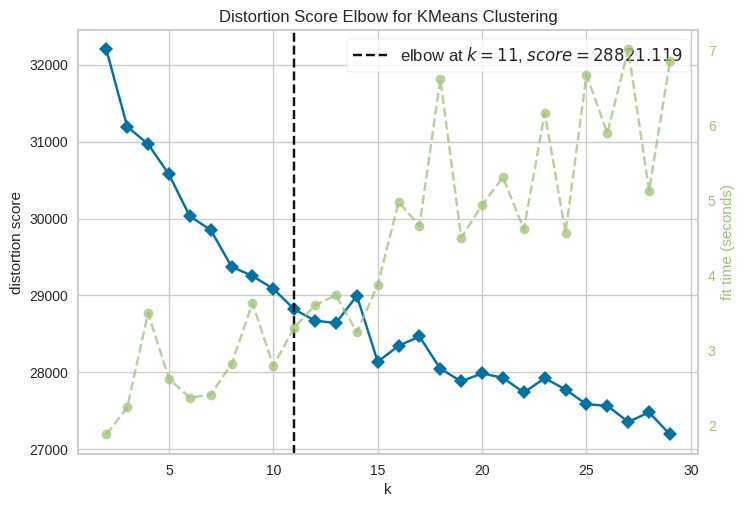

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(bog_df)
visualizer.show()

From the elbow curve it suggest the k-values as 11

In [ ]:
k=KMeans(init='k-means++',n_clusters=11,n_init=100,random_state=0).fit(bog_df)
labels =k.predict(bog_df)
c_d = t_df.assign(Cluster=labels)

In [ ]:
for i in range(11):
  print(c_d[c_d['Cluster'] == i])
  print('*' * 10)

                                                   text  Cluster
0     [stirring, funny, finally, transporting, re-im...        0
1     [apparently, reassembled, cutting-room, floor,...        0
4     [jonathan, parker, bartleby, be-all-end-all, m...        0
5     [campanella, gets, tone, right, funny, middle,...        0
8     [little, less, extreme, past, longer, expositi...        0
...                                                 ...      ...
8727  [experience, watching, blobby, old-school, cgi...        0
8729                          [pretty, dicey, material]        0
8731  [subversive, meditative, clinical, poetic, pia...        0
8736  [often-deadly, boring, strange, reading, class...        0
8738  [safe, conduct, however, ambitious, well-inten...        0

[4650 rows x 2 columns]
**********
                                                   text  Cluster
12    [something, splendid-looking, particular, film...        1
43    [american, adobo, heart, -lrb-, palate, -rrb-,..

From the first task we observe that we have only 2 target values but here the clusters values shows 11 values which may act as like ratings

## DBScan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
nn = NearestNeighbors(n_neighbors=20).fit(bog_df)
distances, indices = nn.kneighbors(bog_df)

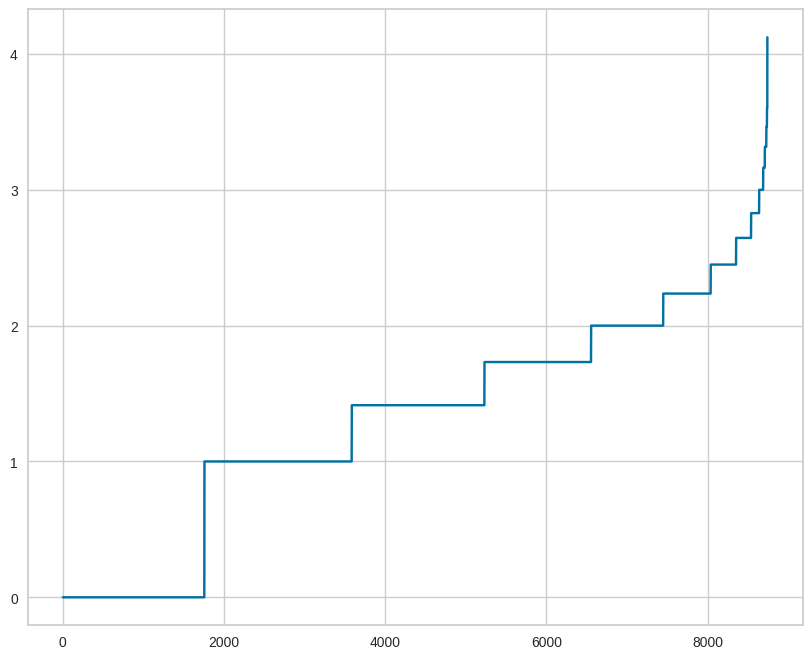

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

It shows that the eps value is 1

In [ ]:
db_model = DBSCAN(eps =  1)
db_model.fit(bog_df)
t_df['label'] = db_model.labels_

In [ ]:
for i in range(-1,1):
  print(t_df[t_df['label'] == i])
  print('*' * 10)

                                                   text  label
2     [presume, audience, n't, sit, still, sociology...     -1
3     [visually, stunning, rumination, love, memory,...     -1
5     [campanella, gets, tone, right, funny, middle,...     -1
6     [fan, film, uninitiated, plays, better, video,...     -1
8     [little, less, extreme, past, longer, expositi...     -1
...                                                 ...    ...
8734                  [..., blade, enjoyable, original]     -1
8736  [often-deadly, boring, strange, reading, class...     -1
8737  [problem, concept, films, concept, poor, one, ...     -1
8739  [film, made, little, wit, interest, profession...     -1
8740                   [real, damn, n't, funny, either]     -1

[5211 rows x 2 columns]
**********
                                                   text  label
0     [stirring, funny, finally, transporting, re-im...      0
1     [apparently, reassembled, cutting-room, floor,...      0
4     [jonathan, pa

It shows that they are 2 labels which are correct as the target in the task-1

## Hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

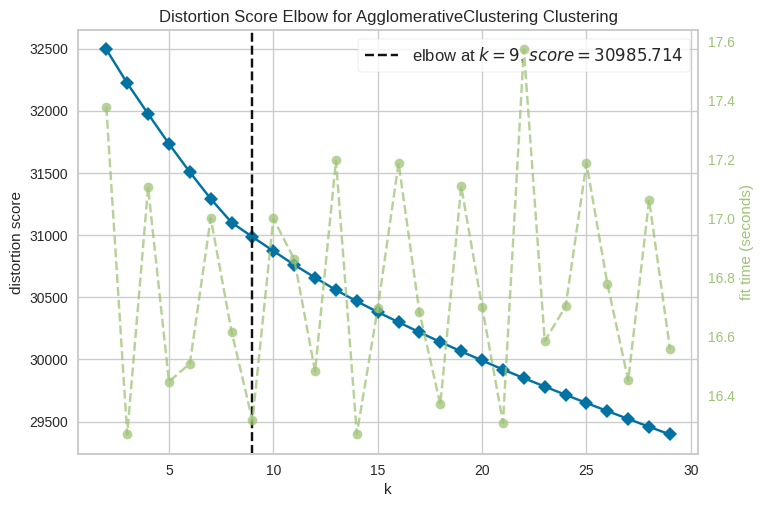

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(bog_df)
visualizer.show()

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(bog_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
c = t_df.assign(Cluster=labels)

In [ ]:
for i in range(9):
  print(c_d[c_d['Cluster'] == i])
  print('*' * 10)

                                                   text  Cluster
0     [stirring, funny, finally, transporting, re-im...        0
1     [apparently, reassembled, cutting-room, floor,...        0
4     [jonathan, parker, bartleby, be-all-end-all, m...        0
5     [campanella, gets, tone, right, funny, middle,...        0
8     [little, less, extreme, past, longer, expositi...        0
...                                                 ...      ...
8727  [experience, watching, blobby, old-school, cgi...        0
8729                          [pretty, dicey, material]        0
8731  [subversive, meditative, clinical, poetic, pia...        0
8736  [often-deadly, boring, strange, reading, class...        0
8738  [safe, conduct, however, ambitious, well-inten...        0

[4650 rows x 2 columns]
**********
                                                   text  Cluster
12    [something, splendid-looking, particular, film...        1
43    [american, adobo, heart, -lrb-, palate, -rrb-,..

## word2vec

In [ ]:
from gensim.models import Word2Vec

In [ ]:
l_df = pd.concat([train, test]).reset_index()

In [ ]:
word2vec = Word2Vec( vector_size = 100, negative=5, hs=1, min_count=2, sample = 0)
word2vec.build_vocab([i for i in t_df['text']])
words = set(word2vec.wv.index_to_key )

In [ ]:
import numpy as np
k = list()
for ls in t_df['text']:
  p = list()
  for i in ls:
    if i in words:
      p.append(word2vec.wv[i])
  k.append(np.array(p))

In [ ]:
final = list()
for i in k:
  final.append(np.array(i))

In [ ]:
final_1 = list()
for i in final:
  p = list()
  z = list()
  for j in i:
    p.append(j)
  for i in range(100):
    sum = 0
    for j in p:
      sum += j[i]
    try:
      avg = sum/len(p)
    except:
      continue
    z.append(avg)
  final_1.append(z)

In [ ]:
p = pd.DataFrame(final_1)
p = p.fillna(0)
p

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000757,0.002255,0.002030,-0.005421,0.000784,-0.005349,0.004690,0.001427,0.001126,0.001172,...,0.001263,0.000432,0.001635,-0.002300,0.003737,-0.000247,0.002996,0.003703,0.000262,-0.001648
1,-0.004768,0.001027,0.003397,0.000224,-0.004614,0.000423,0.000570,0.001186,-0.000396,0.001570,...,0.005670,0.003467,-0.000930,0.006921,0.001199,0.002495,-0.000634,-0.001536,0.003766,0.001292
2,0.000609,-0.000492,0.002113,0.000257,0.001667,0.000425,-0.000737,0.002463,0.000342,0.000585,...,0.001447,0.003373,-0.000286,0.000649,0.002566,0.003283,0.001632,0.000894,0.000054,0.002296
3,-0.001654,-0.001845,0.003310,0.000913,0.000485,-0.000426,-0.001738,-0.000462,-0.000705,0.000087,...,0.002566,0.001909,-0.001976,0.004352,0.002855,0.003930,0.001311,-0.000465,-0.001840,0.002259
4,0.001410,-0.001984,0.000076,-0.001960,-0.002929,-0.000384,0.004550,0.003672,-0.000427,0.002060,...,0.000783,0.000587,0.000825,0.001727,-0.000057,0.002387,-0.002041,0.001970,-0.000916,-0.001172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,0.001164,-0.000600,-0.000596,-0.002470,0.001388,0.000753,-0.000593,-0.001227,-0.000979,-0.002881,...,0.000382,0.001057,0.002783,-0.000343,-0.003848,-0.002693,0.000603,-0.001110,0.001082,-0.000573
8737,-0.002242,-0.000542,0.003749,-0.000007,-0.001611,-0.002029,0.002017,0.000051,-0.002733,-0.000931,...,0.001434,0.000679,0.002789,-0.004442,0.005002,-0.003213,0.001189,-0.001125,-0.000112,0.003282
8738,0.003420,-0.000010,-0.001959,-0.000289,0.000367,0.000621,-0.000902,0.002861,-0.000855,-0.000811,...,-0.000611,0.004264,-0.000251,-0.001921,-0.000317,-0.000563,0.000117,-0.001657,0.003757,0.002098
8739,-0.001526,-0.001371,0.001291,-0.001522,-0.000168,0.000012,0.000760,0.001995,-0.001011,0.001270,...,-0.000566,0.001764,0.001848,-0.000926,0.001023,0.003854,-0.002254,-0.002976,0.000878,-0.000610


In [ ]:
l_df = l_df.drop('index', axis = 1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

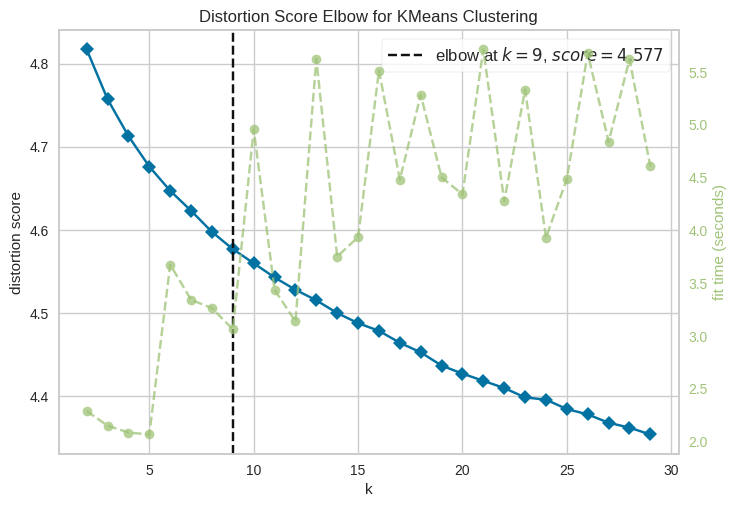

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(p)
visualizer.show()

In [ ]:
k=KMeans(init='k-means++',n_clusters=11,n_init=100,random_state=0).fit(p)
labels =k.predict(p)
c_d = t_df.assign(Cluster=labels)

In [ ]:
for i in range(9):
  print(c_d[c_d['Cluster'] == i])
  print('*' * 10)

                                                   text  Cluster
21                       [slick, engrossing, melodrama]        0
29    [gooding, offers, desperately, ingratiating, p...        0
33                                 [russian, word, wow]        0
37    [could, feel, screenwriter, every, moment, tap...        0
39                  [live, mood, rather, savour, story]        0
...                                                 ...      ...
8639  [director, brian, levant, never, strays, far, ...        0
8644  [one, hour, photo, intriguing, snapshot, one, ...        0
8652  [rather, 'll, wrestle, disbelief, ground, appl...        0
8654  [involving, times, lapses, quite, casually, ab...        0
8659  [film, real, appeal, n't, clooney, fans, adven...        0

[605 rows x 2 columns]
**********
                                                   text  Cluster
0     [stirring, funny, finally, transporting, re-im...        1
38    [overall, cletis, tout, winning, comedy, excit...

## BERT

In [ ]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=cc6d43f7daf4244e2b69f18d3379e7f59f7320c4fdf29174fca40df4802c1918
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [ ]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [ ]:
corpus_embeddings = embedder.encode(corpus)

In [ ]:
l = list()
for i in t_df['text']:
  l.append(embedder.encode(i))

In [ ]:
final_1 = list()
for i in l:
  p = list()
  z = list()
  for j in i:
    p.append(j)
  for i in range(100):
    sum = 0
    for j in p:
      sum += j[i]
    try:
      avg = sum/len(p)
    except:
      continue
    z.append(avg)
  final_1.append(z)

In [ ]:
k  = pd.DataFrame(final_1)
k = k.fillna(0)
k

  

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.167969,0.021387,0.593911,-0.419377,0.052958,0.037624,0.441425,-0.185894,-0.223364,-0.333064,...,0.502056,0.175269,-0.362482,0.392488,0.008869,-0.213924,0.168814,-0.238022,-0.030440,0.462488
1,-0.307642,-0.070378,0.237972,-0.435554,-0.071650,-0.340834,0.488560,0.188070,-0.133194,-0.573156,...,0.395402,-0.079615,-0.266161,0.200320,-0.404064,-0.606785,-0.077505,-0.023523,0.162253,-0.046055
2,-0.258989,-0.001333,0.176976,-0.353039,-0.106550,-0.034013,0.484015,0.008069,-0.371364,-0.221335,...,0.628404,-0.207319,-0.440339,0.414166,-0.216534,-0.320582,-0.317502,-0.276891,0.080810,0.413341
3,0.167706,0.215036,-0.067511,-0.346632,0.143509,-0.060255,0.660729,0.127673,-0.496861,-0.552205,...,0.509036,-0.064064,-0.308608,0.416945,-0.553623,-0.472571,-0.242189,-0.106917,0.027729,0.020226
4,-0.419393,0.086907,-0.285609,-0.434780,0.037292,-0.268726,0.392591,0.303873,-0.141728,-0.582531,...,0.487357,-0.290642,-0.261489,-0.006232,-0.280015,-0.576585,-0.616981,0.167066,0.280543,0.077956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,-0.354090,0.028924,0.077289,-0.318494,-0.195433,-0.108726,0.357173,-0.159162,-0.125306,-0.178428,...,0.632020,-0.273906,-0.340170,0.183937,-0.266849,-0.522882,-0.120305,-0.117160,0.029845,0.202023
8737,-0.280311,0.026333,-0.180951,-0.469496,0.020171,0.163299,0.320515,-0.475732,-0.185448,-0.571071,...,0.725131,0.057854,-0.237736,0.082072,-0.238032,-0.418315,-0.635745,0.231502,0.181344,0.157858
8738,-0.059259,-0.010617,0.126011,-0.233975,-0.047435,-0.049755,0.666971,-0.071273,-0.477184,-0.242120,...,0.672455,-0.039150,-0.329626,0.593964,-0.255472,-0.242960,-0.464227,-0.288559,-0.003267,-0.079876
8739,0.127464,0.134004,-0.047414,-0.316123,0.045698,-0.083169,0.559973,-0.138095,-0.379682,-0.407169,...,0.658884,0.073432,-0.255416,0.181090,0.076816,-0.524404,-0.632717,0.023205,-0.154939,0.266461


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

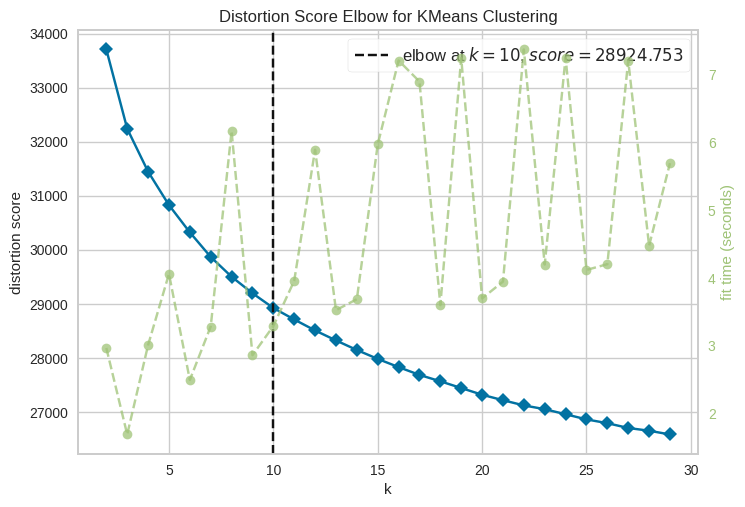

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(k)
visualizer.show()

It suggests that the k = 10

In [ ]:
d=KMeans(init='k-means++',n_clusters=10,n_init=100,random_state=0).fit(k)
labels =d.predict(k)
c_d = t_df.assign(Cluster=labels)

In [ ]:
for i in range(10):
  print(c_d[c_d['Cluster'] == i])
  print('*' * 10)

                                                   text  Cluster
17    [quiet, patient, tenacious, mr., lopez, approa...        0
30    [well-intentioned, effort, still, burdened, ac...        0
59    [though, touch, arthouse, poetic, symbolism, h...        0
97    [woodman, seems, directly, influenced, girl-me...        0
103   [moments, insightful, enough, fondly, remember...        0
...                                                 ...      ...
8713  [ana, vivid, vibrant, individual, movie, focus...        0
8714  [..., polished, relatively, sincere, piece, es...        0
8721  [mysteries, transparently, obvious, slowly, pa...        0
8734                  [..., blade, enjoyable, original]        0
8738  [safe, conduct, however, ambitious, well-inten...        0

[833 rows x 2 columns]
**********
                                                   text  Cluster
4     [jonathan, parker, bartleby, be-all-end-all, m...        1
8     [little, less, extreme, past, longer, expositi...

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
#You can write you answer here. (No code needed)


